In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
file = pd.read_csv(r"C:\Users\jvabi\OneDrive\Documents\My_document\Order_details-masked.csv")

In [26]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB


In [27]:
file["Product_List"] = file["Product"].str.split(",")

In [28]:
file["Product_List"] = file["Product"].astype(str).str.split(",")

In [29]:
print (file["Product_List"])

0                                           [PRODUCT_75]
1                                           [PRODUCT_75]
2                                           [PRODUCT_63]
3                                           [PRODUCT_63]
4       [PRODUCT_34, PRODUCT_86, PRODUCT_57, PRODUCT_89]
                             ...                        
576    [PRODUCT_48, PRODUCT_80, PRODUCT_71, PRODUCT_6...
577                                          [PRODUCT_8]
578    [PRODUCT_36, PRODUCT_14, PRODUCT_64, PRODUCT_2...
579    [PRODUCT_75, PRODUCT_71, PRODUCT_86, PRODUCT_6...
580                             [PRODUCT_66, PRODUCT_34]
Name: Product_List, Length: 581, dtype: object


In [30]:
product_lists = file["Product_List"].dropna()

In [31]:
print(file["Product_List"].dropna()) 

0                                           [PRODUCT_75]
1                                           [PRODUCT_75]
2                                           [PRODUCT_63]
3                                           [PRODUCT_63]
4       [PRODUCT_34, PRODUCT_86, PRODUCT_57, PRODUCT_89]
                             ...                        
576    [PRODUCT_48, PRODUCT_80, PRODUCT_71, PRODUCT_6...
577                                          [PRODUCT_8]
578    [PRODUCT_36, PRODUCT_14, PRODUCT_64, PRODUCT_2...
579    [PRODUCT_75, PRODUCT_71, PRODUCT_86, PRODUCT_6...
580                             [PRODUCT_66, PRODUCT_34]
Name: Product_List, Length: 581, dtype: object


In [33]:
all_product_list = []
for sublist in product_lists:
    
      for i in sublist:
          all_product_list.append(i) 

In [34]:
print(all_product_list)

['PRODUCT_75', 'PRODUCT_75', 'PRODUCT_63', 'PRODUCT_63', 'PRODUCT_34', 'PRODUCT_86', 'PRODUCT_57', 'PRODUCT_89', 'PRODUCT_34', 'PRODUCT_66', 'PRODUCT_58', 'PRODUCT_83', 'PRODUCT_75', 'PRODUCT_63', 'PRODUCT_90', 'PRODUCT_27', 'PRODUCT_5', 'PRODUCT_26', 'PRODUCT_63', 'PRODUCT_63', 'PRODUCT_5', 'PRODUCT_34', 'PRODUCT_84', 'PRODUCT_27', 'PRODUCT_27', 'PRODUCT_25', 'PRODUCT_75', 'PRODUCT_84', 'PRODUCT_34', 'PRODUCT_85', 'PRODUCT_63', 'PRODUCT_75', 'PRODUCT_75', 'PRODUCT_27', 'PRODUCT_75', 'PRODUCT_63', 'PRODUCT_63', 'PRODUCT_25', 'PRODUCT_63', 'PRODUCT_75', 'PRODUCT_63', 'PRODUCT_27', 'PRODUCT_27', 'PRODUCT_25', 'PRODUCT_63', 'PRODUCT_26', 'PRODUCT_24', 'PRODUCT_34', 'PRODUCT_75', 'PRODUCT_72', 'PRODUCT_27', 'PRODUCT_63', 'PRODUCT_90', 'PRODUCT_63', 'PRODUCT_75', 'PRODUCT_57', 'PRODUCT_90', 'PRODUCT_66', 'PRODUCT_58', 'PRODUCT_24', 'PRODUCT_83', 'PRODUCT_84', 'PRODUCT_68', 'PRODUCT_27', 'PRODUCT_72', 'PRODUCT_34', 'PRODUCT_78', 'PRODUCT_25', 'PRODUCT_25', 'PRODUCT_34', 'PRODUCT_25', 'PRODUC

In [35]:
from collections import Counter

In [38]:
prod_counts = Counter(all_product_list)

In [41]:
count=prod_counts.values()
product=prod_counts.keys()

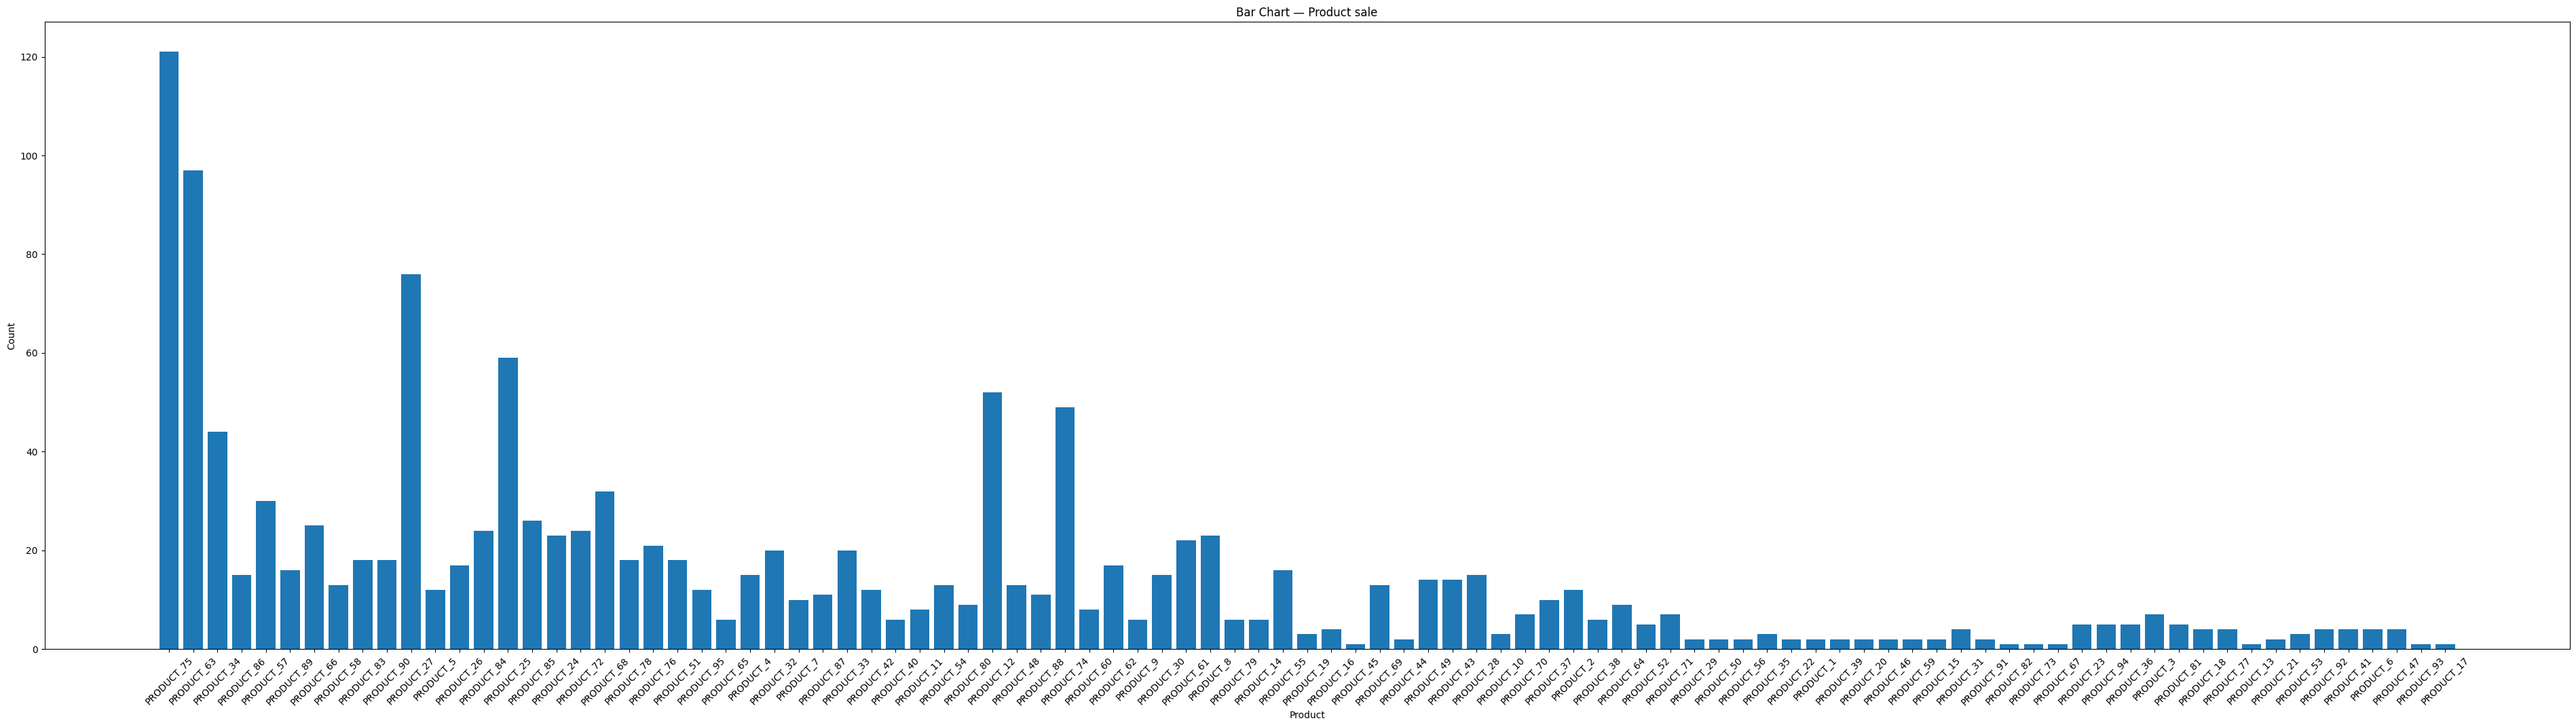

In [52]:
plt.figure(figsize=(48,12))
plt.bar(product, count)
plt.title("Bar Chart — Product sale")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [56]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:\Users\jvabi\OneDrive\Documents\My_document\Order_details-masked.csv")

# Convert Transaction Date to datetime
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce", dayfirst=True)

# Split multiple products per row
df["Product_List"] = df["Product"].astype(str).str.split(",")


In [61]:
print(df)

           Name                      Email  \
0      PERSON_1         PERSON_1@gmail.com   
1      PERSON_2  PERSON_2@tataprojects.com   
2      PERSON_3         PERSON_3@gmail.com   
3      PERSON_4         PERSON_4@gmail.com   
4      PERSON_5         PERSON_5@gmail.com   
..          ...                        ...   
576  PERSON_522       PERSON_522@gmail.com   
577  PERSON_523       PERSON_523@gmail.com   
578  PERSON_523       PERSON_523@gmail.com   
579  PERSON_524       PERSON_524@gmail.com   
580  PERSON_525       PERSON_525@gmail.com   

                                               Product    Transaction Date  \
0                                           PRODUCT_75 2021-03-01 00:47:26   
1                                           PRODUCT_75 2021-03-01 02:04:07   
2                                           PRODUCT_63 2021-03-01 09:10:43   
3                                           PRODUCT_63 2021-03-01 09:49:48   
4          PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89 20

In [57]:
# --- Flatten the data into one row per (Person, Product) ---
records = []
for _,row in df.iterrows():
    name = row["Name"]
    email = row["Email"]
    date = row["Transaction Date"]
    for prod in row["Product_List"]:
        records.append((name, email, prod.strip(), date))

In [57]:
# --- Flatten the data into one row per (Person, Product) ---
records = []
for _,row in df.iterrows():
    name = row["Name"]
    email = row["Email"]
    date = row["Transaction Date"]
    for prod in row["Product_List"]:
        records.append((name, email, prod.strip(), date))

In [67]:
flat_df

,Name,Email,Product,Transaction Date,Date_only
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,2021-03-01 00:47:26,2021-03-01
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,2021-03-01 02:04:07,2021-03-01
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,2021-03-01 09:10:43,2021-03-01
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,2021-03-01 09:49:48,2021-03-01
4,PERSON_5,PERSON_5@gmail.com,PRODUCT_34,2021-03-01 10:56:46,2021-03-01
...,...,...,...,...,...
1344,PERSON_524,PERSON_524@gmail.com,PRODUCT_86,2021-03-07 23:59:26,2021-03-07
1345,PERSON_524,PERSON_524@gmail.com,PRODUCT_63,2021-03-07 23:59:26,2021-03-07
1346,PERSON_524,PERSON_524@gmail.com,PRODUCT_54,2021-03-07 23:59:26,2021-03-07
1347,PERSON_525,PERSON_525@gmail.com,PRODUCT_66,2021-03-07 23:59:19,2021-03-07


In [58]:
flat_df = pd.DataFrame(records, columns=["Name", "Email", "Product", "Transaction Date"])

# --- Count total purchases per product ---
product_counts = flat_df["Product"].value_counts()

# --- Count unique buyers per product ---
unique_buyers = flat_df.groupby("Product")["Email"].nunique().sort_values(ascending=False)

In [62]:
flat_df["Date_only"] = flat_df["Transaction Date"].dt.date
top_day = (
    flat_df.groupby(["Product", "Date_only"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Product", "Count"], ascending=[True, False])
)

In [65]:
# Keep only the top day per product
top_day = top_day.drop_duplicates("Product", keep="first").set_index("Product")

# --- Combine all results ---
summary = pd.DataFrame({
    "Total Purchases": product_counts,
    "Unique Buyers": unique_buyers,
}).join(top_day[["Date_only", "Count"]]).rename(columns={
    "Date_only": "Most Popular Day",
    "Count": "Transactions on That Day"
}).sort_values("Total Purchases", ascending=False)

# --- Show top 10 products ---
print("🏆 Top 10 Products Summary:")
display(summary.head(10))

# --- Show single top product explicitly ---
most_bought = summary.index[0]
row = summary.iloc[0]
print(f"\nMost bought product: {most_bought}")
print(f"→ Total Purchases: {row['Total Purchases']}")
print(f"→ Unique Buyers: {row['Unique Buyers']}")
print(f"→ Most Popular Day: {row['Most Popular Day']} ({row['Transactions on That Day']} transactions)")

🏆 Top 10 Products Summary:


,Total Purchases,Unique Buyers,Most Popular Day,Transactions on That Day
Product,,,,
PRODUCT_75,121,121,2021-03-03,29
PRODUCT_63,97,97,2021-03-03,29
PRODUCT_27,76,76,2021-03-03,23
PRODUCT_25,59,59,2021-03-07,13
PRODUCT_12,52,48,2021-03-07,21
PRODUCT_74,49,49,2021-03-06,12
PRODUCT_34,44,42,2021-03-07,10
PRODUCT_68,32,32,2021-03-07,14
PRODUCT_57,30,30,2021-03-04,8



Most bought product: PRODUCT_75
→ Total Purchases: 121
→ Unique Buyers: 121
→ Most Popular Day: 2021-03-03 (29 transactions)


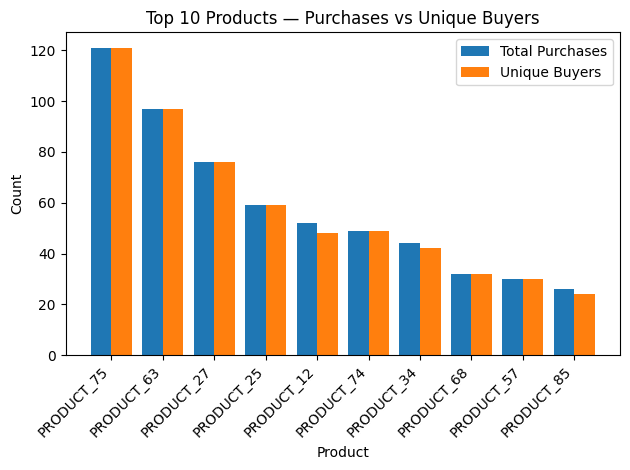

In [66]:
top10 = summary.head(10)

# x positions for bars
x = np.arange(len(top10))
width = 0.4

plt.figure()
plt.bar(x - width/2, top10["Total Purchases"].values, width=width, label="Total Purchases")
plt.bar(x + width/2, top10["Unique Buyers"].values,  width=width, label="Unique Buyers")
plt.title("Top 10 Products — Purchases vs Unique Buyers")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(x, top10.index, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()